In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = data.drop(['CustomerID'], axis = 1)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Density'>

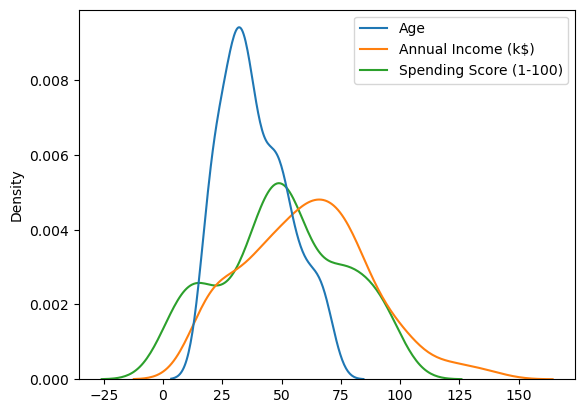

In [7]:
sns.kdeplot(data = data)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
data ['Gender'] = le.fit_transform(data['Gender'])

In [10]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

In [12]:
km.fit(data)

KMeans(n_clusters=4)

In [13]:
y_pred = km.fit_transform(data)

In [14]:
y_pred

array([[ 42.8283147 ,  84.6496473 ,  38.27248572,  78.32311659],
       [ 56.57198547,  72.49844361,  15.76380186,  97.80246113],
       [ 55.13481544, 104.55852842,  69.59318742,  75.26294302],
       [ 52.44236875,  71.38716194,  13.14470096,  94.13660171],
       [ 34.91677543,  81.3231838 ,  36.72481089,  74.32123335],
       [ 51.59632939,  70.62358666,  12.18595294,  92.94547834],
       [ 48.89629713, 102.46249454,  69.83345713,  70.6968962 ],
       [ 63.8958622 ,  70.23257129,  22.54830416, 104.25227872],
       [ 53.16732587, 108.64243265,  81.89102702,  73.98975311],
       [ 44.55163154,  68.34826892,  11.24710847,  87.66673564],
       [ 46.91874579, 101.88328525,  74.18700516,  73.56884841],
       [ 64.65512643,  69.65371283,  28.47425439, 106.02828433],
       [ 42.0584162 ,  97.84812259,  68.4658227 ,  69.78536435],
       [ 49.59790358,  67.30107416,   9.18836331,  90.95378867],
       [ 42.10816872,  96.04645627,  63.05607725,  67.71520087],
       [ 51.86012797,  67

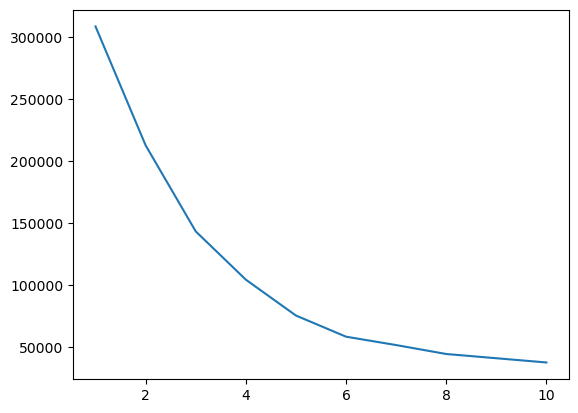

In [15]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(data)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

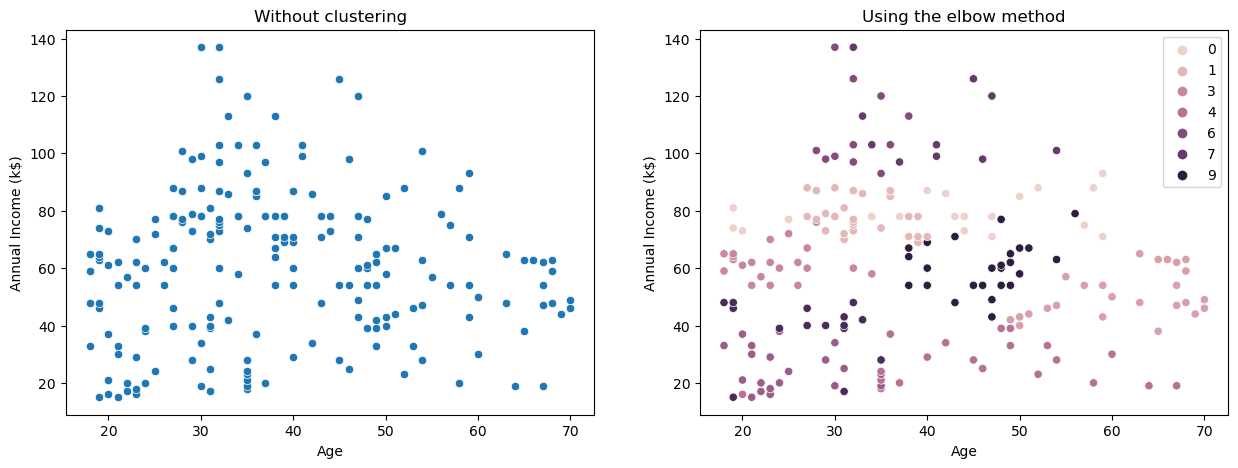

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=data, x='Age', y='Annual Income (k$)').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=data, x='Age', y='Annual Income (k$)', hue=clustering.labels_).set_title('Using the elbow method');

# Thanks